In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [67]:
df=pd.read_csv("/content/survey lung cancer.csv") #calling dataset
print(df.head())

  GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0      M   69        1               2        2              1   
1      M   74        2               1        1              1   
2      F   59        1               1        1              2   
3      M   63        2               2        2              1   
4      F   63        1               2        1              1   

   CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  COUGHING  \
0                1         2         1         2                  2         2   
1                2         2         2         1                  1         1   
2                1         2         1         2                  1         2   
3                1         1         1         1                  2         1   
4                1         1         1         2                  1         2   

   SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN LUNG_CANCER  
0                    2                      

In [68]:
#check missing values
print(df.isnull().sum())    #no missing values

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64


In [69]:
df.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

In [70]:
df.shape

(309, 16)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

<Axes: >

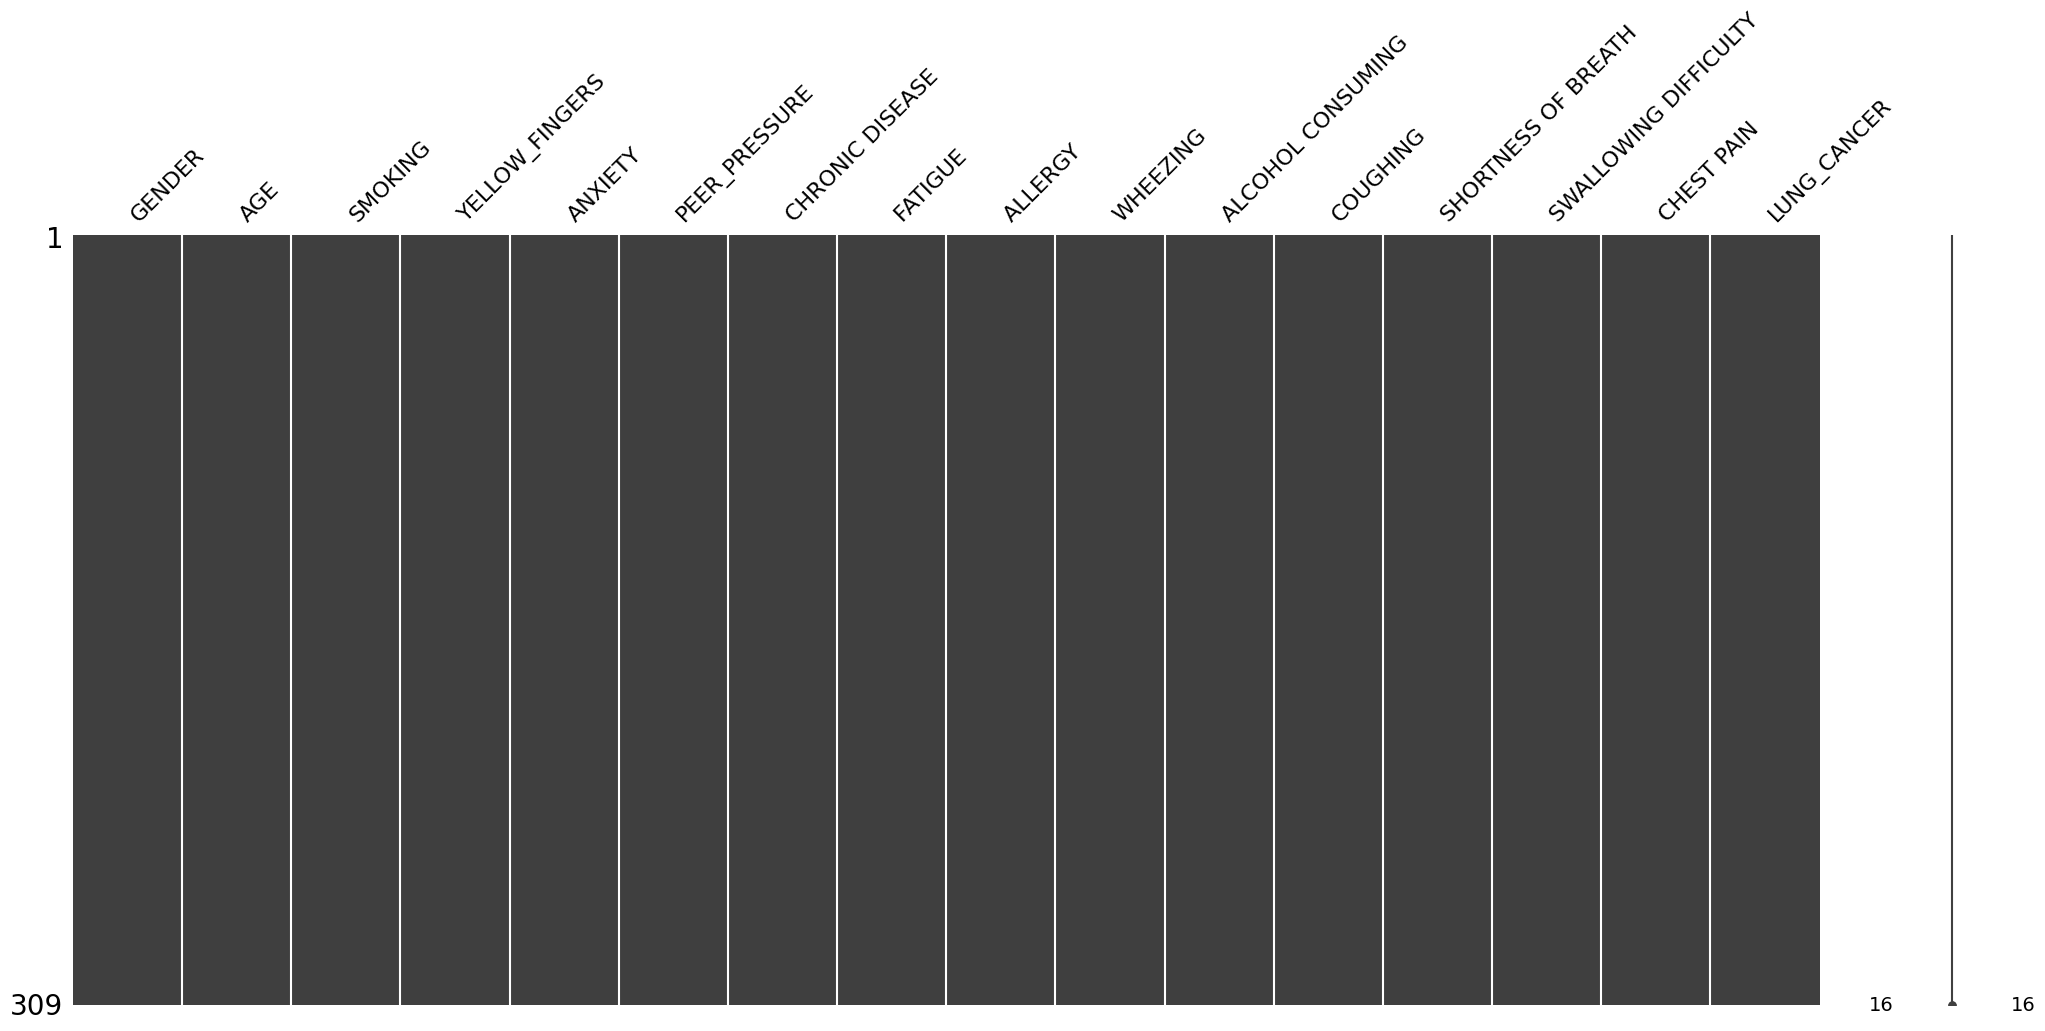

In [72]:
#checking missing values
import missingno as m        #check the missing value by graphical
m.matrix(df)

In [73]:
#convert object into int values
label_encoder=preprocessing.LabelEncoder()
df['GENDER']=label_encoder.fit_transform(df['GENDER'])
df['LUNG_CANCER']=label_encoder.fit_transform(df['LUNG_CANCER'])

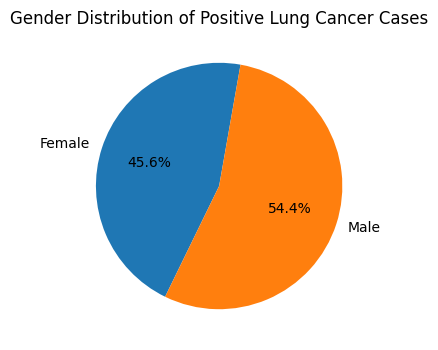

In [74]:
#distribution positive gender wise
import matplotlib.pyplot as plt
positive_cases = df[df['LUNG_CANCER'] == 1]

gender_distribution = positive_cases.groupby('GENDER')['GENDER'].count()
plt.figure(figsize=(4, 4))
plt.pie(gender_distribution, labels=['Female', 'Male'], autopct='%1.1f%%',startangle=80)
plt.title('Gender Distribution of Positive Lung Cancer Cases')
plt.show()


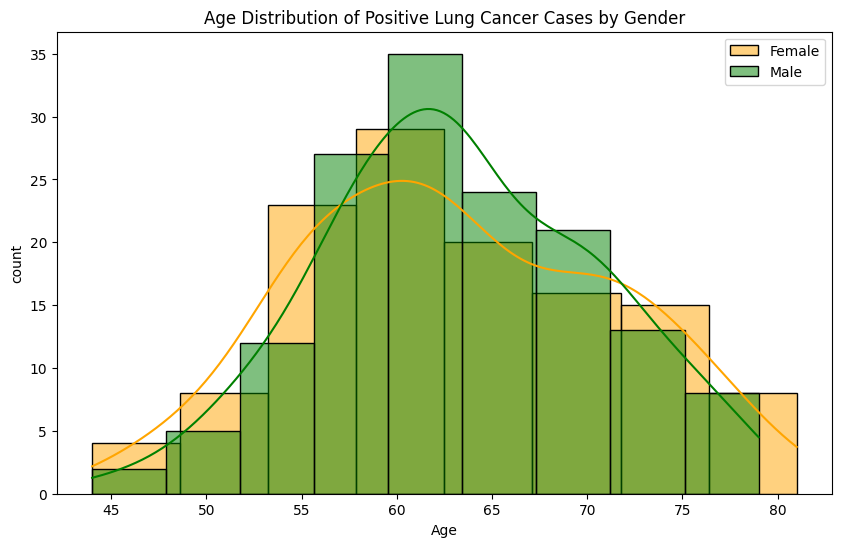

In [75]:

import matplotlib.pyplot as plt
import seaborn as sns

positive_cases = df[df['LUNG_CANCER'] == 1]

# Create a histogram with curves
plt.figure(figsize=(10, 6))
sns.histplot(positive_cases[positive_cases['GENDER'] == 0]['AGE'], kde=True, label='Female', color='orange')
sns.histplot(positive_cases[positive_cases['GENDER'] == 1]['AGE'], kde=True, label='Male', color='green')
plt.xlabel('Age')
plt.ylabel('count')
plt.title('Age Distribution of Positive Lung Cancer Cases by Gender')
plt.legend()
plt.show()


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   GENDER                 309 non-null    int64
 1   AGE                    309 non-null    int64
 2   SMOKING                309 non-null    int64
 3   YELLOW_FINGERS         309 non-null    int64
 4   ANXIETY                309 non-null    int64
 5   PEER_PRESSURE          309 non-null    int64
 6   CHRONIC DISEASE        309 non-null    int64
 7   FATIGUE                309 non-null    int64
 8   ALLERGY                309 non-null    int64
 9   WHEEZING               309 non-null    int64
 10  ALCOHOL CONSUMING      309 non-null    int64
 11  COUGHING               309 non-null    int64
 12  SHORTNESS OF BREATH    309 non-null    int64
 13  SWALLOWING DIFFICULTY  309 non-null    int64
 14  CHEST PAIN             309 non-null    int64
 15  LUNG_CANCER            309 non-null    i

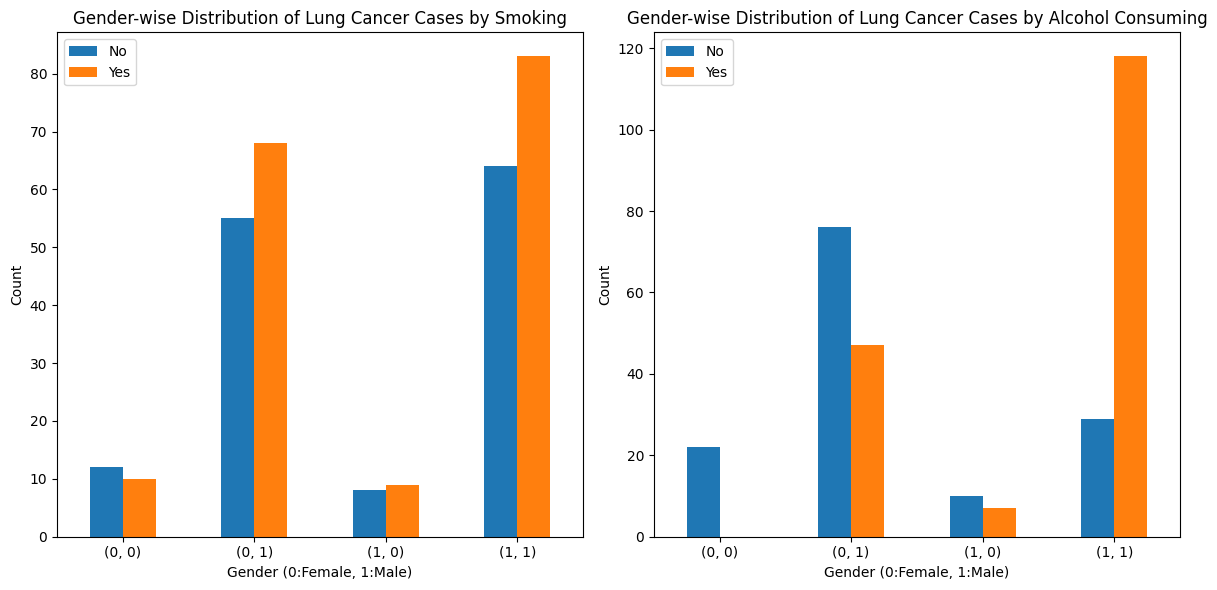

In [77]:
# due to human habbits
import matplotlib.pyplot as plt

# Group by gender and lung cancer status, then count the number of cases for each combination
gender_lung_cancer_smoking = df.groupby(['GENDER', 'LUNG_CANCER', 'SMOKING'])['SMOKING'].count().unstack().fillna(0)
gender_lung_cancer_alcohol = df.groupby(['GENDER', 'LUNG_CANCER', 'ALCOHOL CONSUMING'])['ALCOHOL CONSUMING'].count().unstack().fillna(0)

# Create the bar chart for Smoking
plt.figure(figsize=(12, 6))
ax1 = plt.subplot(1, 2, 1)
gender_lung_cancer_smoking.plot(kind='bar', ax=ax1)
plt.title('Gender-wise Distribution of Lung Cancer Cases by Smoking')
plt.xlabel('Gender (0:Female, 1:Male)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(['No', 'Yes'])

# Create the bar chart for Alcohol Consuming
ax2 = plt.subplot(1, 2, 2)
gender_lung_cancer_alcohol.plot(kind='bar', ax=ax2)
plt.title('Gender-wise Distribution of Lung Cancer Cases by Alcohol Consuming')
plt.xlabel('Gender (0:Female, 1:Male)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(['No', 'Yes'])

plt.tight_layout()
plt.show()


<Figure size 1000x1500 with 0 Axes>

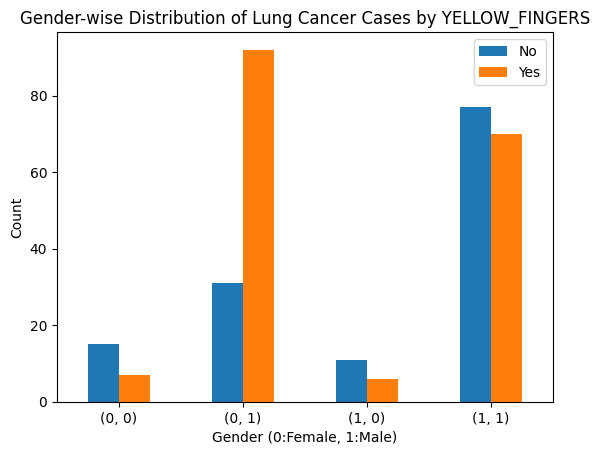

<Figure size 1000x1500 with 0 Axes>

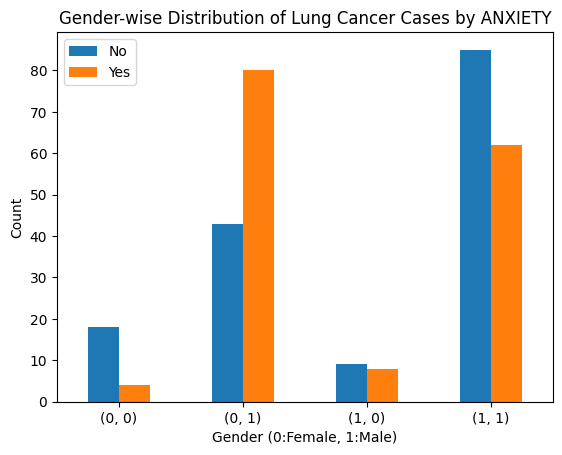

<Figure size 1000x1500 with 0 Axes>

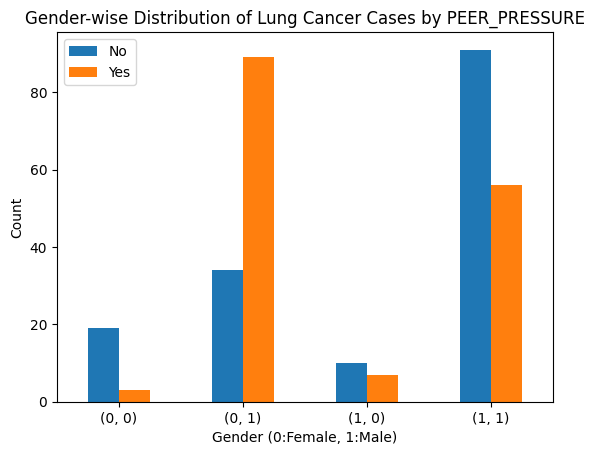

<Figure size 1000x1500 with 0 Axes>

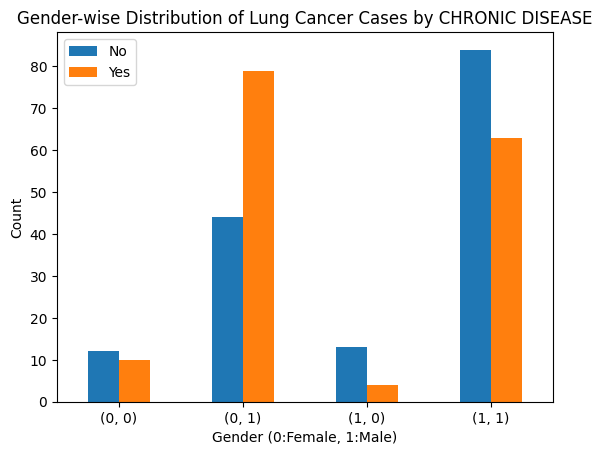

<Figure size 1000x1500 with 0 Axes>

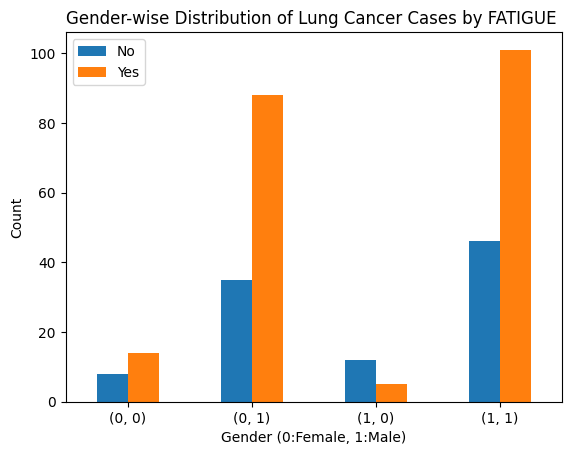

<Figure size 1000x1500 with 0 Axes>

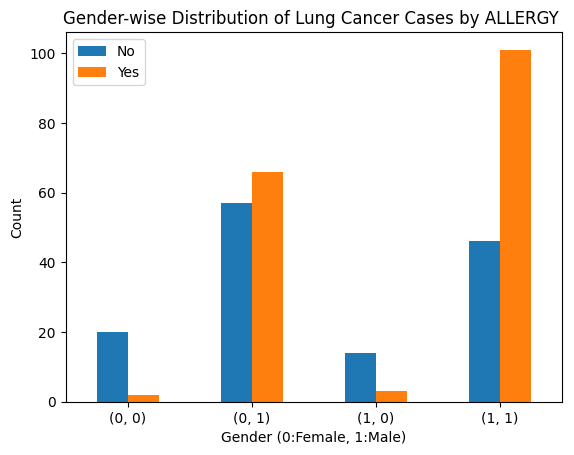

<Figure size 1000x1500 with 0 Axes>

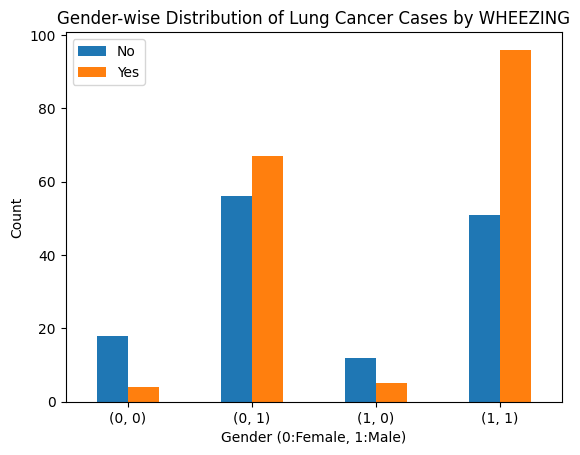

<Figure size 1000x1500 with 0 Axes>

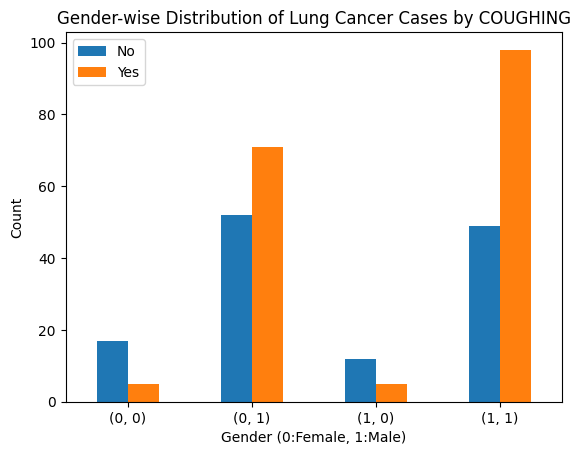

<Figure size 1000x1500 with 0 Axes>

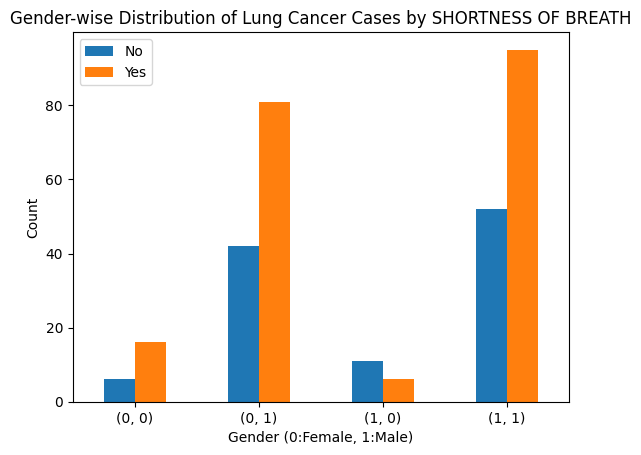

<Figure size 1000x1500 with 0 Axes>

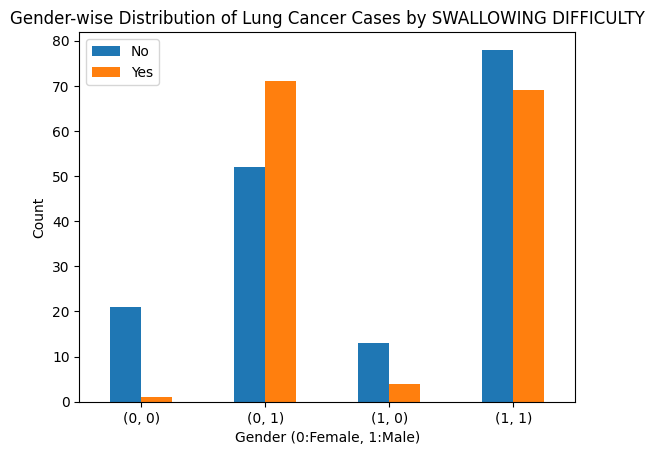

<Figure size 1000x1500 with 0 Axes>

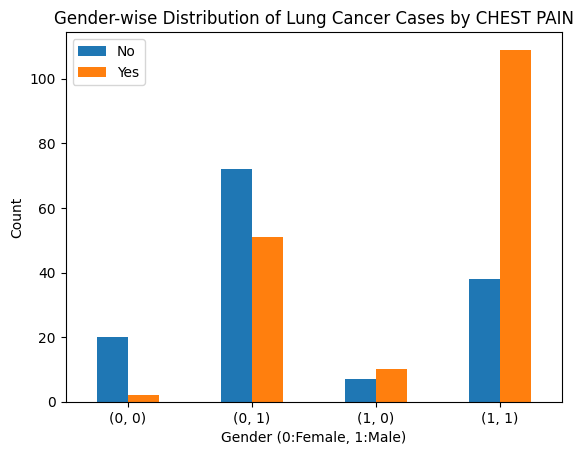

In [78]:
#due to symtomps
import matplotlib.pyplot as plt
symptoms = ['YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING', 'COUGHING', 'SHORTNESS OF BREATH', 'SWALLOWING DIFFICULTY', 'CHEST PAIN']

for symptom in symptoms:
  gender_lung_cancer_symptom = df.groupby(['GENDER', 'LUNG_CANCER', symptom])[symptom].count().unstack().fillna(0)

  plt.figure(figsize=(10,15))
  gender_lung_cancer_symptom.plot(kind='bar')
  plt.title(f'Gender-wise Distribution of Lung Cancer Cases by {symptom}')
  plt.xlabel('Gender (0:Female, 1:Male)')
  plt.ylabel('Count')
  plt.xticks(rotation=0)
  plt.legend(['No', 'Yes'])
  plt.show()


In [79]:
#check duplicate values
print(df.duplicated().sum())

28


In [80]:
duplicate=df[df.duplicated(keep=False)]
duplicate

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
13,1,58,2,1,1,1,1,2,2,2,2,2,2,1,2,1
23,1,60,2,1,1,1,1,2,2,2,2,2,2,1,2,1
51,1,63,2,2,2,1,2,2,2,2,1,1,2,1,1,1
127,1,58,2,2,2,2,2,1,1,1,2,1,1,2,2,1
128,0,58,2,2,2,2,1,2,1,1,1,2,2,2,1,1
129,0,63,1,1,1,1,2,2,1,1,1,1,2,1,1,0
130,0,51,2,2,2,2,1,2,1,1,1,1,2,2,1,1
131,0,61,1,2,2,2,1,1,2,2,1,2,1,2,1,1
132,0,61,2,1,1,1,2,2,2,1,1,1,2,1,1,1
133,1,76,2,1,1,1,1,2,2,2,2,2,2,1,2,1


In [81]:
df.drop_duplicates(inplace=True)

In [82]:
df.shape

(281, 16)

In [83]:
#detect outlier
df.describe()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
count,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000
mean,0.523132,63.032028,1.537367,1.569395,1.494662,1.508897,1.519573,1.661922,1.551601,1.548043,1.555160,1.572954,1.626335,1.469751,1.558719,0.864769
std,0.500356,7.688747,0.499491,0.496044,0.500864,0.500813,0.500508,0.473899,0.498217,0.498574,0.497835,0.495532,0.484639,0.499975,0.497426,0.342581
min,0.000000,43.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,58.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,1.000000,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000
75%,1.000000,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000
max,1.000000,81.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000


<Axes: >

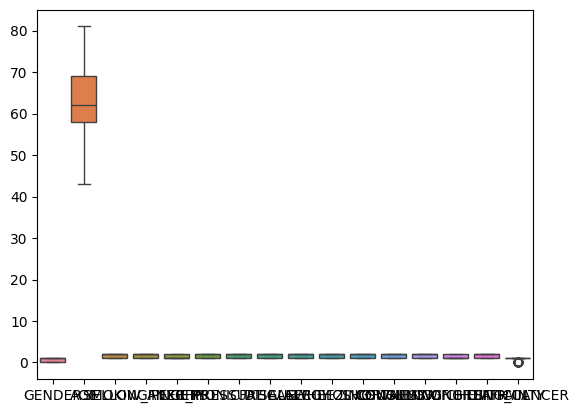

In [84]:
sns.boxplot(df)

array([[<Axes: title={'center': 'GENDER'}>,
        <Axes: title={'center': 'AGE'}>,
        <Axes: title={'center': 'SMOKING'}>,
        <Axes: title={'center': 'YELLOW_FINGERS'}>],
       [<Axes: title={'center': 'ANXIETY'}>,
        <Axes: title={'center': 'PEER_PRESSURE'}>,
        <Axes: title={'center': 'CHRONIC DISEASE'}>,
        <Axes: title={'center': 'FATIGUE '}>],
       [<Axes: title={'center': 'ALLERGY '}>,
        <Axes: title={'center': 'WHEEZING'}>,
        <Axes: title={'center': 'ALCOHOL CONSUMING'}>,
        <Axes: title={'center': 'COUGHING'}>],
       [<Axes: title={'center': 'SHORTNESS OF BREATH'}>,
        <Axes: title={'center': 'SWALLOWING DIFFICULTY'}>,
        <Axes: title={'center': 'CHEST PAIN'}>,
        <Axes: title={'center': 'LUNG_CANCER'}>]], dtype=object)

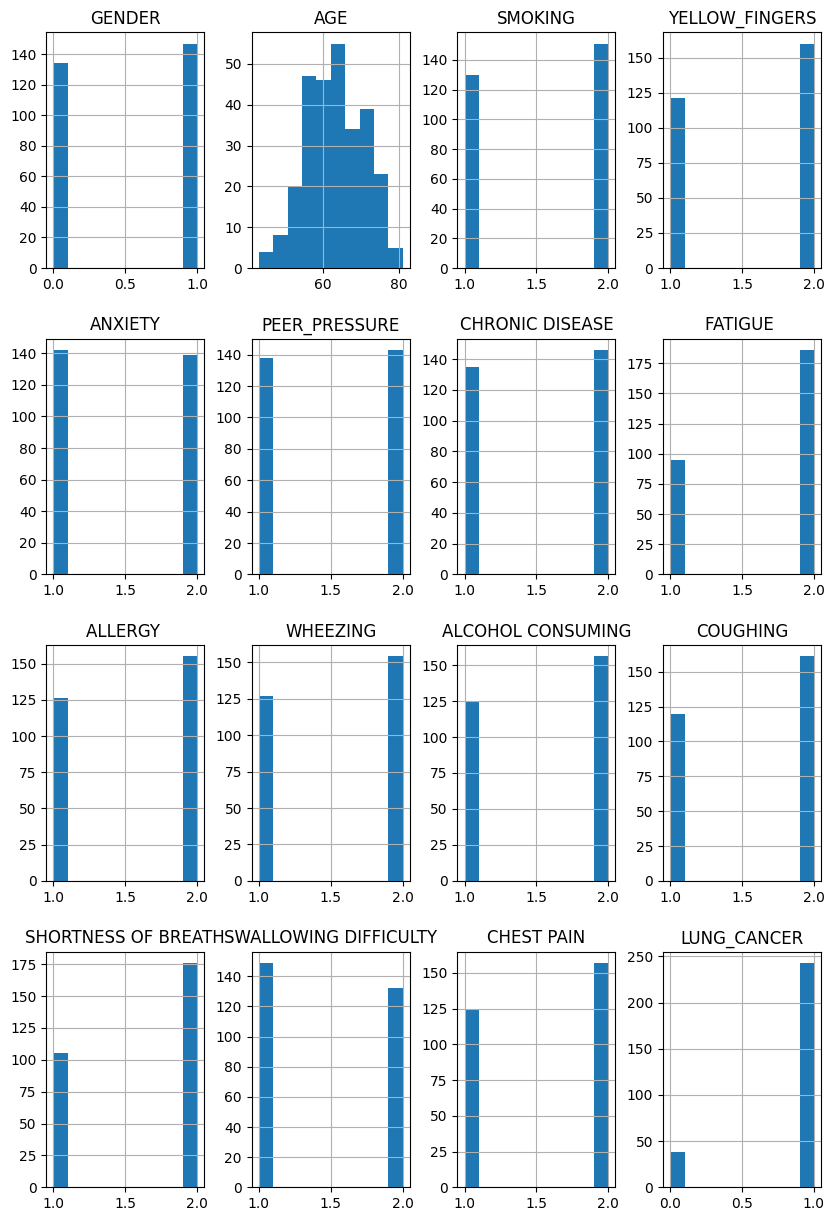

In [85]:
df.hist(figsize=(10,15))

<Axes: xlabel='LUNG_CANCER', ylabel='count'>

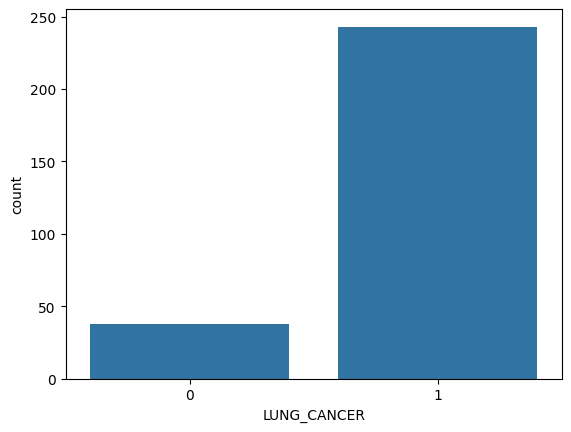

In [86]:
import seaborn as sns
sns.countplot(x='LUNG_CANCER',data=df)

In [87]:
#outlier
import numpy as np

def find_outliers(th):
  q1 = np.percentile(th, 25)
  q3 = np.percentile(th, 75)
  iqr = q3 - q1
  lower = q1 - (1.5 * iqr)
  upper = q3 + (1.5 * iqr)

  outliers = df[(df < lower) | (df > upper)]
  return outliers

In [88]:
print("Number of outliers: ",len(find_outliers(df)))

Number of outliers:  281


In [89]:
#handling outliers
from scipy.stats import zscore
z=np.abs(zscore(df))
threshold=3
df1=df[(z<3).all(axis=1)]

In [90]:
#feautre selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


<Axes: title={'center': 'correlation with target selection'}>

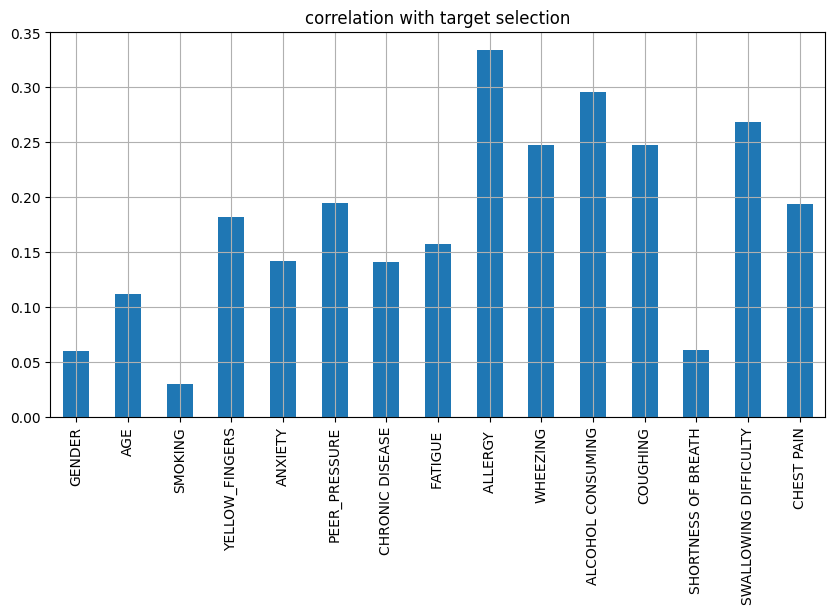

In [91]:
df.drop('LUNG_CANCER',axis=1).corrwith(df['LUNG_CANCER']).plot(kind='bar',grid=True,figsize=(10,5),title="correlation with target selection") # removed leading space from column name

In [92]:
df.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

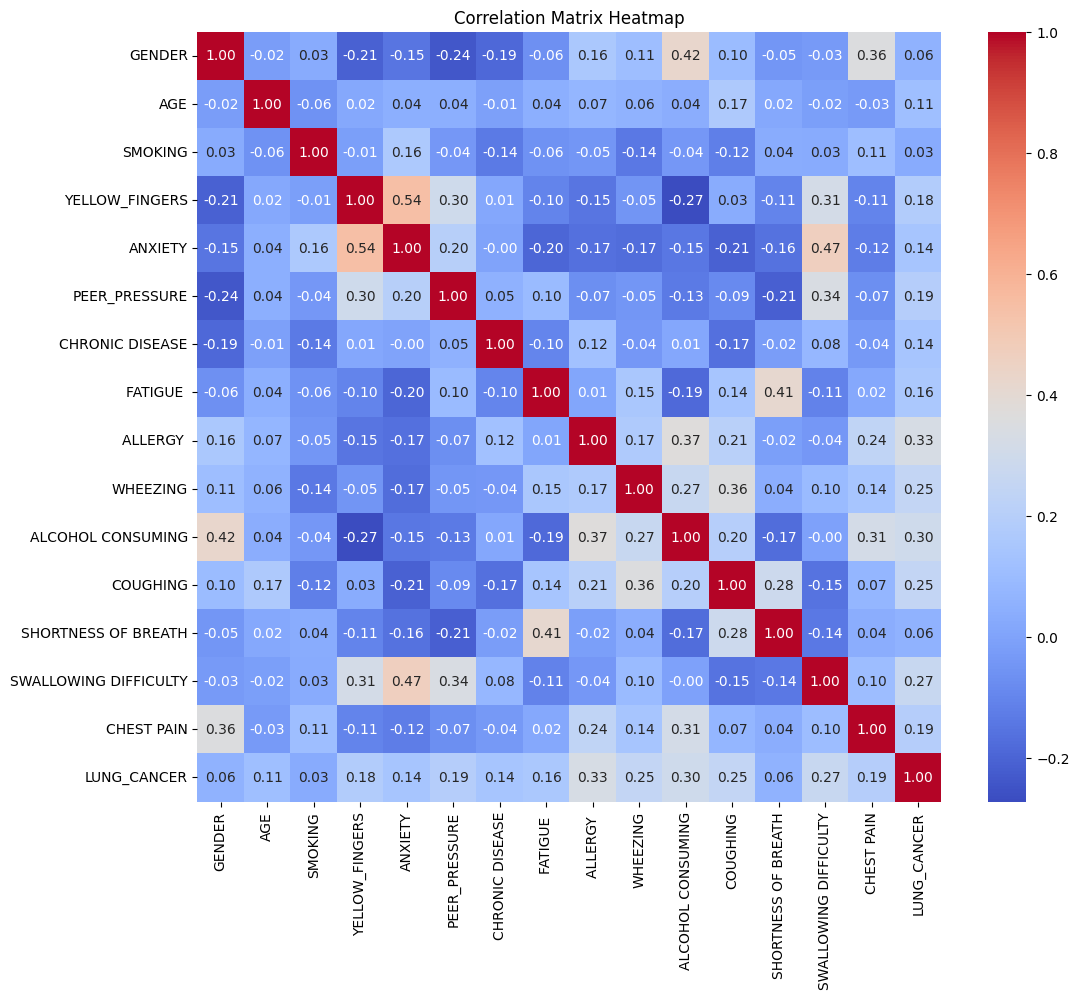

In [93]:
# heat map for correlation

import matplotlib.pyplot as plt
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()


In [94]:
#drop feautre selection
x=df.drop(['SHORTNESS OF BREATH','LUNG_CANCER'],axis=1)

In [95]:
x.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SWALLOWING DIFFICULTY', 'CHEST PAIN'],
      dtype='object')

In [96]:
x.shape

(281, 14)

In [97]:
y=df['LUNG_CANCER']
print(y)

0      1
1      1
2      0
3      0
4      0
      ..
279    1
280    0
281    0
282    0
283    1
Name: LUNG_CANCER, Length: 281, dtype: int64


In [98]:
#split of dataset
from sklearn.model_selection import train_test_split,cross_val_score
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=0)

In [99]:
print(x_train)

     GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
8         0   68        2               1        2              1   
5         0   75        1               2        1              1   
106       0   61        2               2        2              2   
227       1   71        1               2        2              1   
139       1   63        1               2        1              1   
..      ...  ...      ...             ...      ...            ...   
253       0   67        2               2        2              2   
192       0   51        2               2        2              2   
117       1   58        1               2        1              2   
47        0   64        2               2        1              2   
172       1   56        1               2        1              2   

     CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  \
8                  1         2         1         1                  1   
5                  2     

In [100]:
print(x_test)

     GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
89        0   55        2               1        1              2   
12        0   60        2               1        1              1   
124       1   70        2               1        1              1   
222       0   77        1               1        1              2   
64        1   74        1               2        1              2   
220       0   57        1               1        2              2   
201       0   60        1               1        1              1   
200       0   63        1               1        1              2   
269       1   55        1               1        1              1   
76        0   76        1               2        2              2   
213       1   64        2               2        2              2   
218       0   70        1               1        1              2   
250       1   69        2               2        2              2   
168       1   44        1         

In [101]:
print(y_test)

89     1
12     0
124    1
222    1
64     1
220    1
201    1
200    1
269    1
76     1
213    1
218    1
250    1
168    1
15     1
157    0
92     1
97     1
22     0
230    1
63     1
153    0
103    1
237    1
232    1
59     1
74     1
166    1
110    1
Name: LUNG_CANCER, dtype: int64


In [102]:
from sklearn.metrics import accuracy_score

In [103]:
#algorithm
from sklearn.linear_model import LogisticRegression         #logistic regression
lg=LogisticRegression()
lg.fit(x_train,y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [104]:
y_predic=lg.predict(x_test)
print(y_predic)

[1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1]


In [105]:
a2=accuracy_score(y_test,y_predic)
print(a2)

0.9310344827586207


In [106]:
from sklearn.ensemble import RandomForestClassifier           #randomforest
base_model=RandomForestClassifier()
base_model.fit(x_train,y_train)

RandomForestClassifier()

In [107]:
r = base_model.predict(x_test)
print(r)
a3 = accuracy_score(y_test, r)
print(a3)



[1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
0.9655172413793104


In [108]:
#svm algorithm
from sklearn.svm import SVC
svm=SVC(probability=True)
svm.fit(x_train,y_train)

SVC(probability=True)

In [109]:
y_train_p=svm.predict(x_train)
y_predict=svm.predict(x_test)
print(accuracy_score(y_train,y_train_p))
print(accuracy_score(y_test,y_predict))

0.8650793650793651
0.8620689655172413


In [110]:
#descision tree algorithm
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [111]:
y_train_p=dt.predict(x_train)
y_predict=dt.predict(x_test)
print(accuracy_score(y_train,y_train_p))
print(accuracy_score(y_test,y_predict))

0.996031746031746
0.8275862068965517


In [112]:
#hybrid approch
#logestic +randomforest
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
rf1=RandomForestClassifier()
lr1=LogisticRegression()
estimators=[]
estimators.append(('rf1',rf1))
estimators.append(('lr1',lr1))
from sklearn.ensemble import StackingClassifier
hybrid=StackingClassifier(estimators)
hybrid.fit(x_train,y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

StackingClassifier(estimators=[('rf1', RandomForestClassifier()),
                               ('lr1', LogisticRegression())])

In [113]:
h1=hybrid.score(x_train,y_train)
print(h1)
h2=hybrid.score(x_test,y_test)
print(h2)

0.9563492063492064
0.9310344827586207


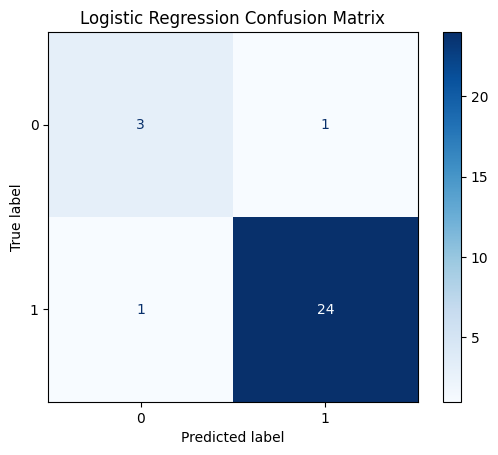

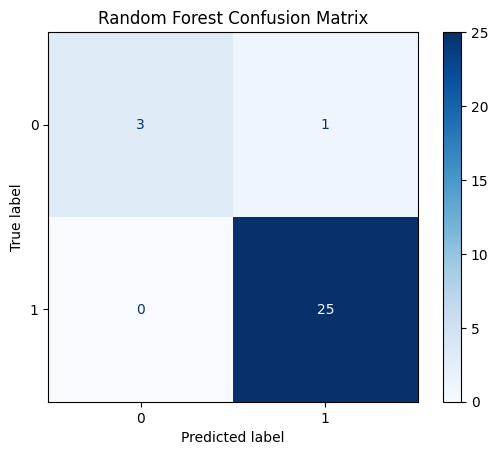

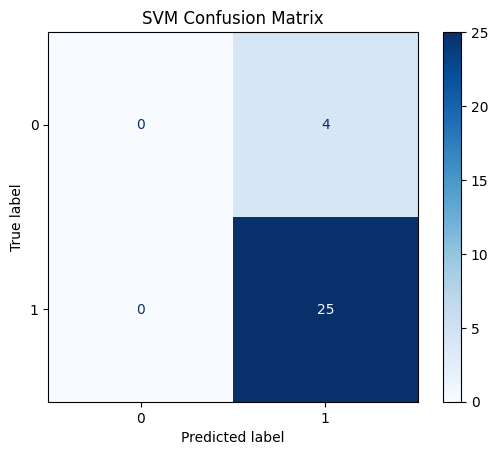

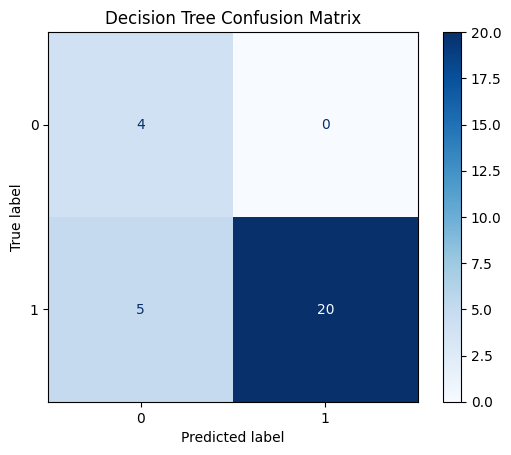

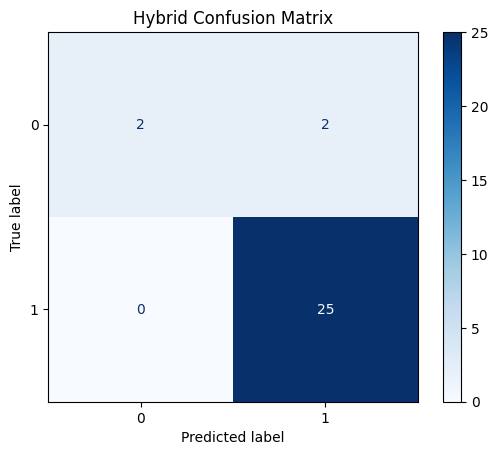

In [114]:
#confusion matrix of algorithm
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Logistic Regression
y_pred_lr = lg.predict(x_test)
cm_lr = confusion_matrix(y_test, y_pred_lr)
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=lg.classes_)
disp_lr.plot(cmap=plt.cm.Blues)
plt.title("Logistic Regression Confusion Matrix")
plt.show()

# Random Forest
y_pred_rf = base_model.predict(x_test)
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=base_model.classes_)
disp_rf.plot(cmap=plt.cm.Blues)
plt.title("Random Forest Confusion Matrix")
plt.show()

# SVM
y_pred_svm = svm.predict(x_test)
cm_svm = confusion_matrix(y_test, y_pred_svm)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=svm.classes_)
disp_svm.plot(cmap=plt.cm.Blues)
plt.title("SVM Confusion Matrix")
plt.show()

# Decision Tree
y_pred_dt = dt.predict(x_test)
cm_dt = confusion_matrix(y_test, y_pred_dt)
disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=dt.classes_)
disp_dt.plot(cmap=plt.cm.Blues)
plt.title("Decision Tree Confusion Matrix")
plt.show()

# Hybrid (Stacking)
y_pred_hybrid = hybrid.predict(x_test)
cm_hybrid = confusion_matrix(y_test, y_pred_hybrid)
disp_hybrid = ConfusionMatrixDisplay(confusion_matrix=cm_hybrid, display_labels=hybrid.classes_)
disp_hybrid.plot(cmap=plt.cm.Blues)
plt.title("Hybrid Confusion Matrix")
plt.show()


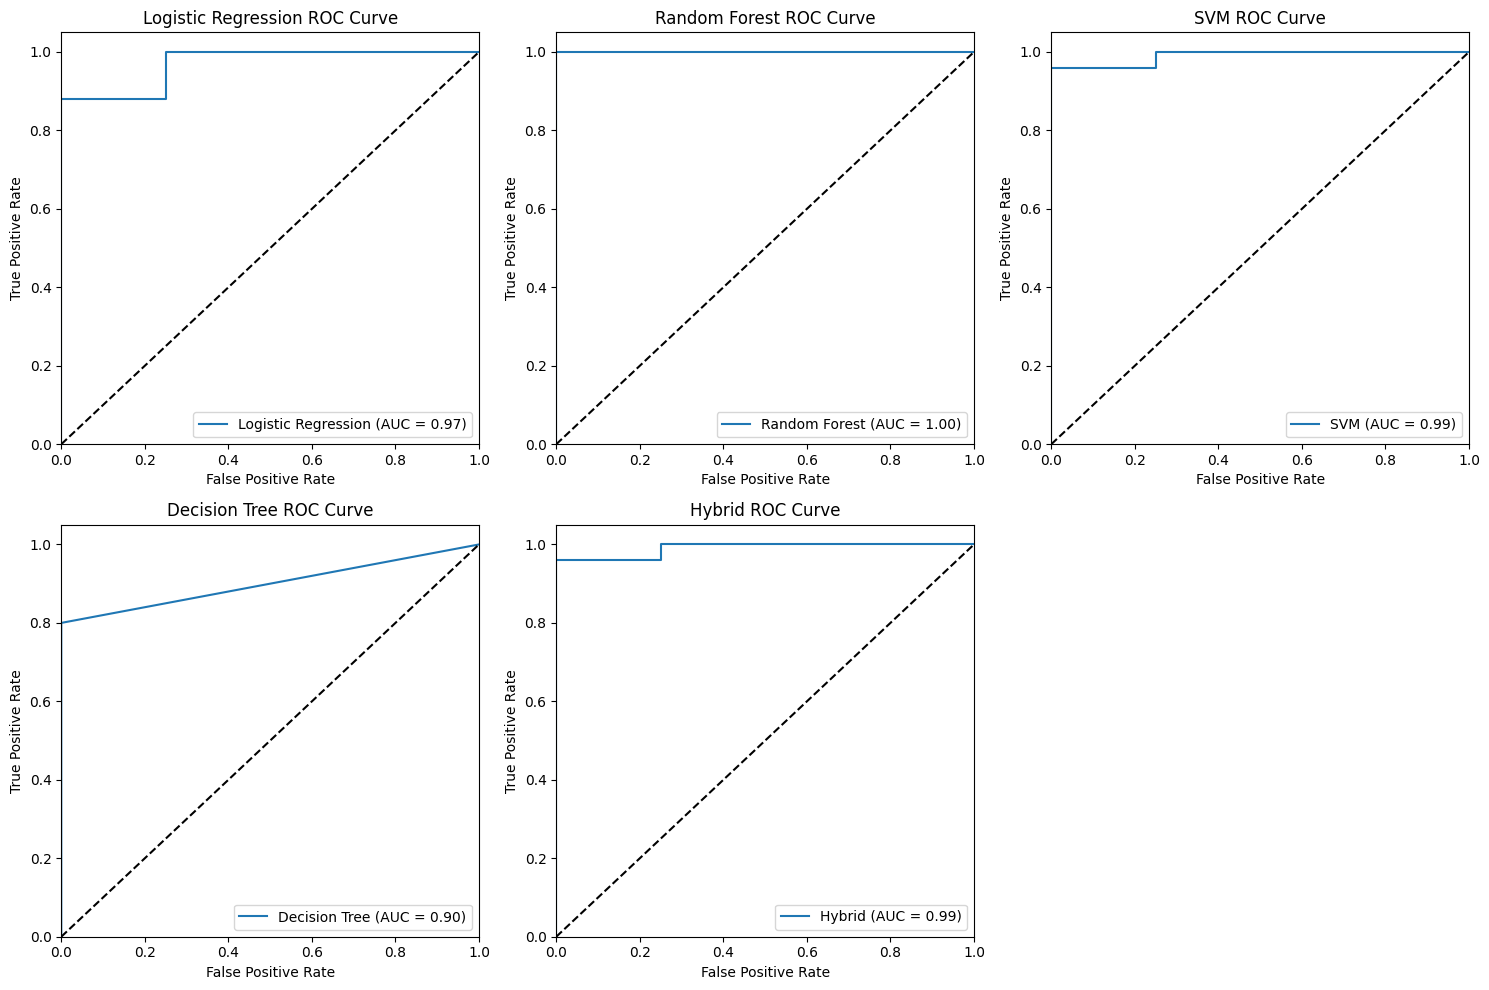

In [115]:
# ROC/AUC curve of all model
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Create a figure with subplots for each model
plt.figure(figsize=(15, 10))

# Logistic Regression ROC curve
y_pred_proba_lr = lg.predict_proba(x_test)[:, 1]
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_proba_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.subplot(2, 3, 1)
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression (AUC = %0.2f)' % roc_auc_lr)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.legend(loc="lower right")

# Random Forest ROC curve
y_pred_proba_rf = base_model.predict_proba(x_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.subplot(2, 3, 2)
plt.plot(fpr_rf, tpr_rf, label='Random Forest (AUC = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.legend(loc="lower right")

# SVM ROC curve
y_pred_proba_svm = svm.predict_proba(x_test)[:, 1]
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_proba_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

plt.subplot(2, 3, 3)
plt.plot(fpr_svm, tpr_svm, label='SVM (AUC = %0.2f)' % roc_auc_svm)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM ROC Curve')
plt.legend(loc="lower right")

# Decision Tree ROC curve
y_pred_proba_dt = dt.predict_proba(x_test)[:, 1]
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_proba_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

plt.subplot(2, 3, 4)
plt.plot(fpr_dt, tpr_dt, label='Decision Tree (AUC = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree ROC Curve')
plt.legend(loc="lower right")

# Hybrid ROC curve
y_pred_proba_hybrid = hybrid.predict_proba(x_test)[:, 1]
fpr_hybrid, tpr_hybrid, _ = roc_curve(y_test, y_pred_proba_hybrid)
roc_auc_hybrid = auc(fpr_hybrid, tpr_hybrid)

plt.subplot(2, 3, 5)
plt.plot(fpr_hybrid, tpr_hybrid, label='Hybrid (AUC = %0.2f)' % roc_auc_hybrid)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Hybrid ROC Curve')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()
